# Data Cleaning And Explanatory Data Analysis

#### Loading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

sys.path.append(os.path.abspath(os.path.join('../scripts')))
from cleaner import *
from visualizer import *
from helper import *


In [ ]:
df = pd.read_csv("../data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 32', inplace=True, axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
percent_missing(df)

The dataset contains 0.0 % missing values.


In [ ]:
# Checking if there are any missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.shape

(569, 32)

### Data Content

- ID number
- Diagnosis (M = malignant, B = benign)
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

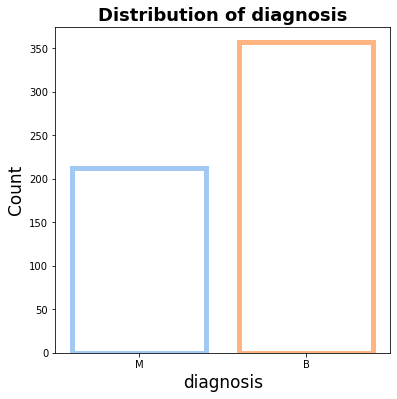

In [ ]:

plot_count(df, 'diagnosis')


# Univariate Analysis

In [ ]:
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
color = ["crimson", "steelblue", "gold", "chocolate", "darkviolet", "limegreen", "darkorange", "red", "slategrey", "k"]    

<Figure size 432x432 with 0 Axes>

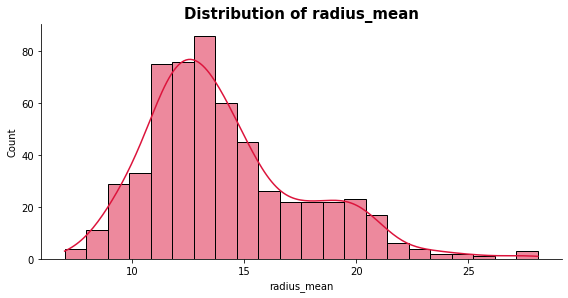

<Figure size 432x432 with 0 Axes>

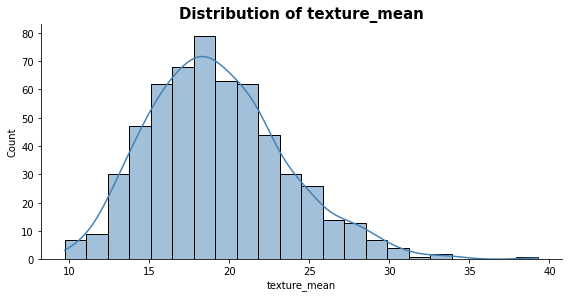

<Figure size 432x432 with 0 Axes>

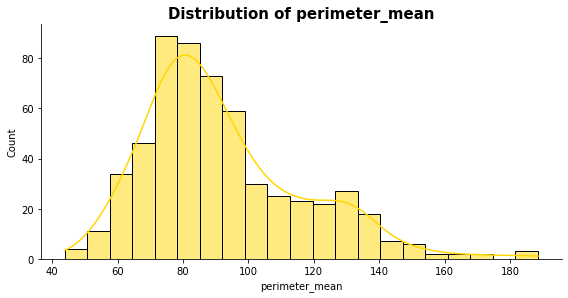

<Figure size 432x432 with 0 Axes>

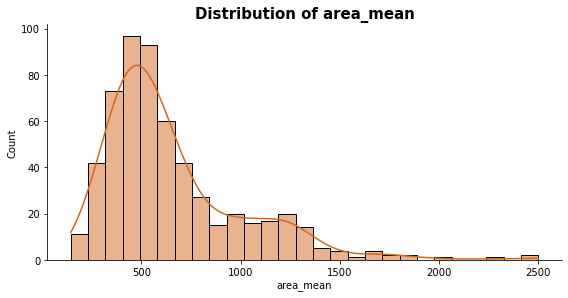

<Figure size 432x432 with 0 Axes>

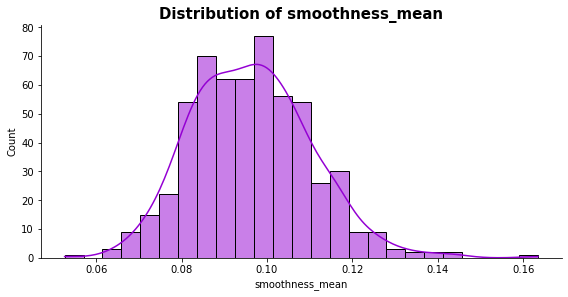

<Figure size 432x432 with 0 Axes>

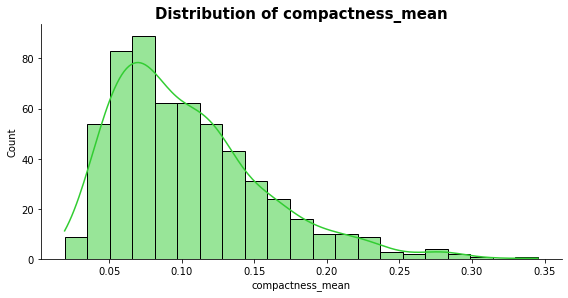

<Figure size 432x432 with 0 Axes>

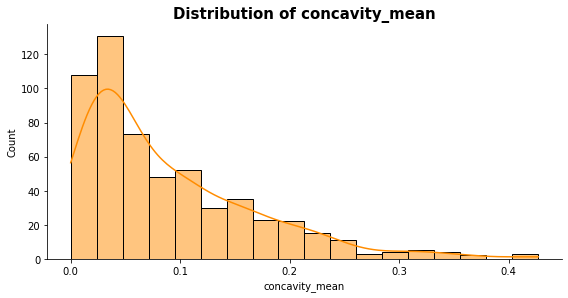

<Figure size 432x432 with 0 Axes>

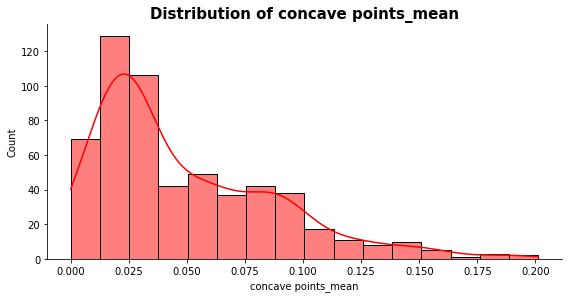

<Figure size 432x432 with 0 Axes>

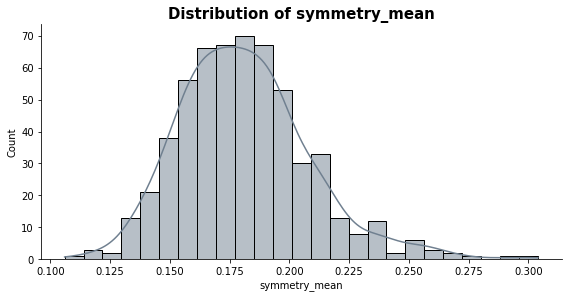

<Figure size 432x432 with 0 Axes>

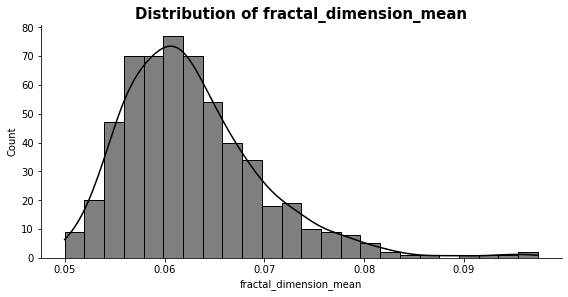

In [ ]:
for i in range(len(mean_col)):
    plot_hist(df, mean_col[i], color[i])

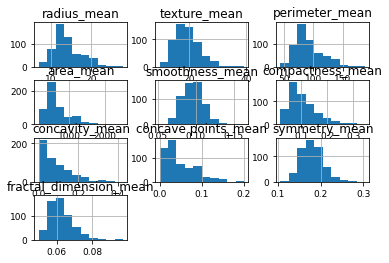

In [ ]:
fig = df[mean_col].hist(xlabelsize=9, ylabelsize=9)
plt.show()

# Bivariate Analysis

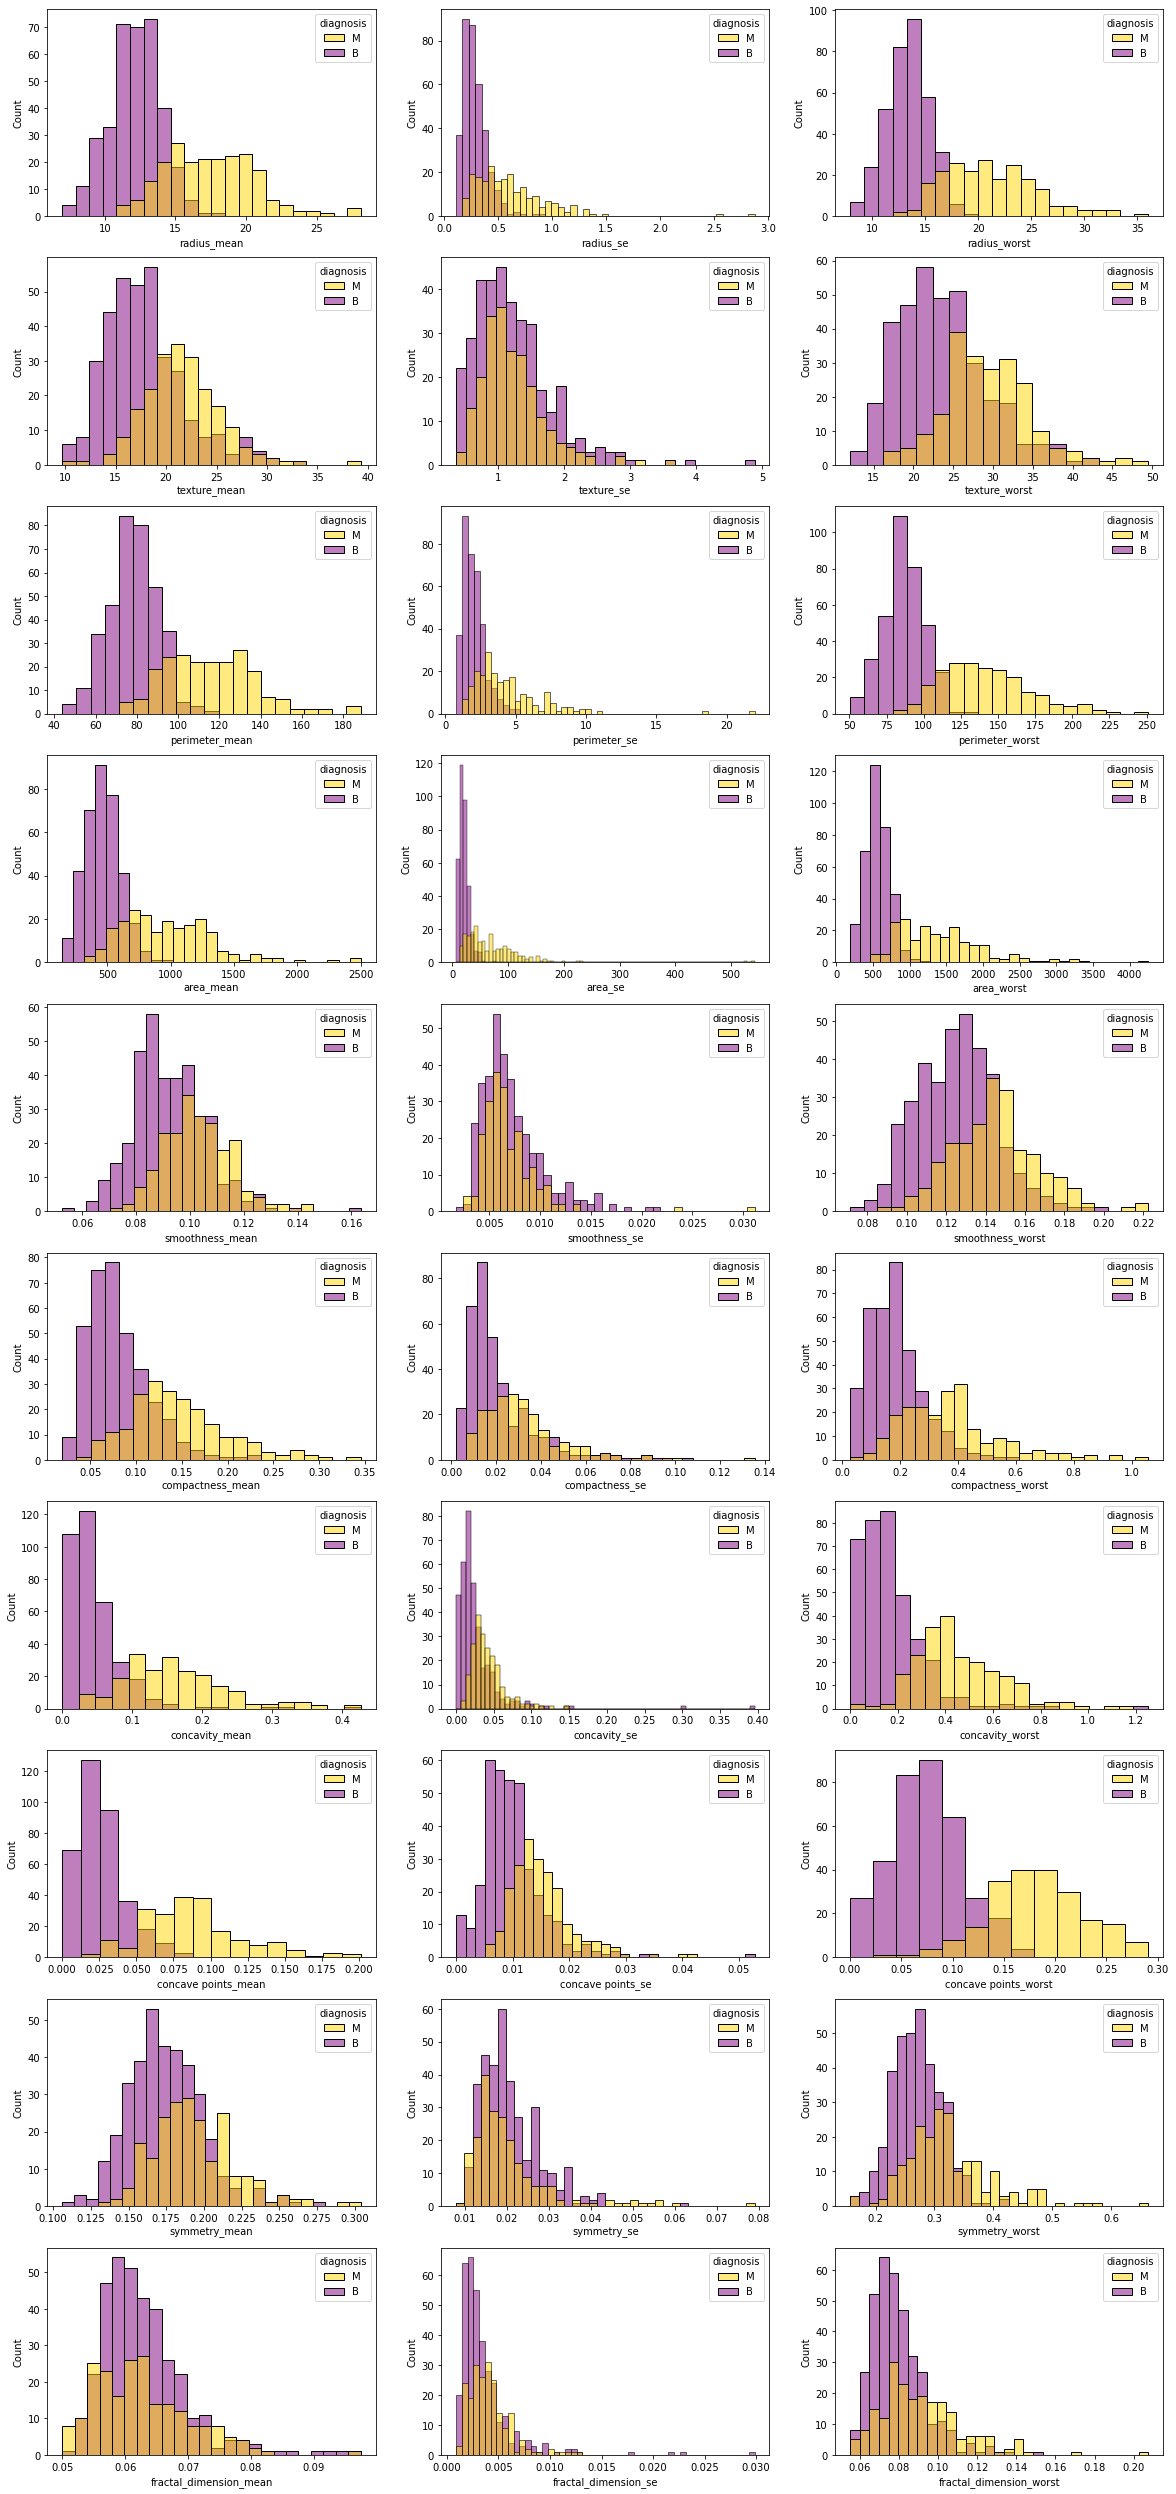

In [15]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
bivariate_plot(df,columns,fields)

In [16]:
M = df[df.diagnosis == 'M'].area_mean
M.max()
M = df[df.diagnosis == 'B'].area_mean
M.max()
#Insights functions


992.1

# Correlation

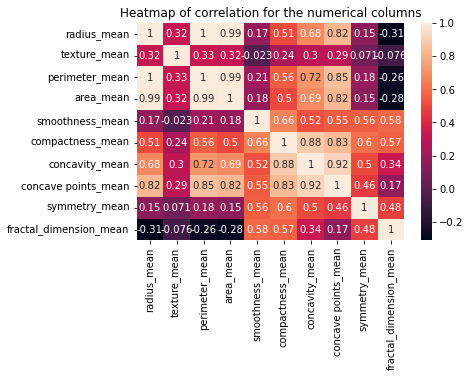

In [17]:
corr = df[mean_col].corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()

# Outliers

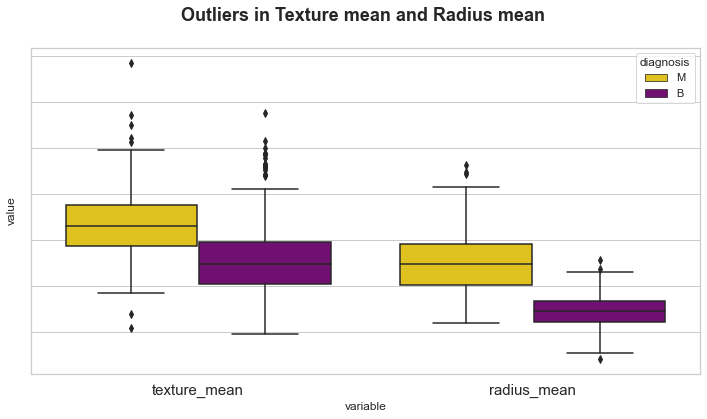

In [18]:
columns = ['texture_mean', 'radius_mean']
plot_outlier(df,columns,'Outliers in Texture mean and Radius mean \n')

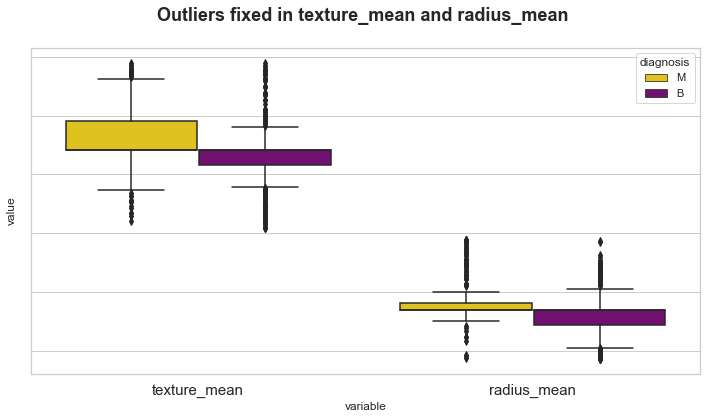

In [19]:
#Fixing the outliers
df_clean = fix_outlier(df)
plot_outlier(df_clean,columns, 'Outliers fixed in texture_mean and radius_mean \n')

## Scaling and Transformation

In [20]:
def scaler(df):
    df_new = (df-df.min())/(df.max()-df.min())
    return df_new

In [21]:
encoded_df_clean = encoding_data(df_clean)
scaled_df = scaler(encoded_df_clean)
scaled_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.409314,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.456057,0.372414,0.111545,0.388921,0.244331,0.413168,0.380485,0.400593,0.465498,0.429087,0.406494,0.3391,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,0.000915,1.0,0.409314,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,0.456057,0.372414,0.428214,0.388921,0.244331,0.018811,0.000000,0.130193,0.814762,0.429087,0.555844,0.3391,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,0.092495,1.0,0.409314,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.271971,0.372414,0.428214,0.388921,0.244331,0.329526,0.380485,0.861647,0.465498,0.882212,0.406494,0.3391,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765


In [22]:
new_df = scaled_df.drop(['id'],axis=1)
new_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.409314,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.456057,0.372414,0.111545,0.388921,0.244331,0.413168,0.380485,0.400593,0.465498,0.429087,0.406494,0.33910,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,1.0,0.409314,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,0.456057,0.372414,0.428214,0.388921,0.244331,0.018811,0.000000,0.130193,0.814762,0.429087,0.555844,0.33910,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,1.0,0.409314,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.271971,0.372414,0.428214,0.388921,0.244331,0.329526,0.380485,0.861647,0.465498,0.882212,0.406494,0.33910,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765
3,1.0,0.409314,0.747780,0.083305,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,0.456057,0.372414,0.503203,0.388921,0.343087,0.406785,0.380485,0.400593,0.465498,0.429087,0.406494,0.32872,0.627315,0.357472,0.092140,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
4,1.0,0.409314,0.474245,0.382648,0.360927,0.735869,0.423183,0.316195,0.245670,0.562130,0.134204,0.372414,0.428214,0.388921,0.244331,0.406785,0.595250,0.400593,0.465498,0.288462,0.406494,0.33910,0.501157,0.328167,0.301037,0.707483,0.301199,0.418033,0.362807,0.471111,0.258002



# Random Forest Classifier Model
 ### Feature Importance
   Random Forest is a supervised machine learning & classification algorithm made up of many decision trees.

In [23]:
X = new_df.drop(["diagnosis"], axis=1)
y = new_df["diagnosis"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=10
)

In [25]:
classifier = RandomForestClassifier(n_estimators=100)

In [26]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
print ('Accuracy Score of the random forest regressor is :',accuracy_score(y_test, y_pred))

Accuracy Score of the random forest regressor is : 0.8771929824561403


In [29]:
#Calculating feature Importance from our model
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
topfeatures_df = feature_df.head(10)
topfeatures_df.shape
topfeatures_df.head()

,feature,importance
26,concavity_worst,0.069075
27,concave points_worst,0.065201
23,area_worst,0.064632
20,radius_worst,0.062321
22,perimeter_worst,0.056522


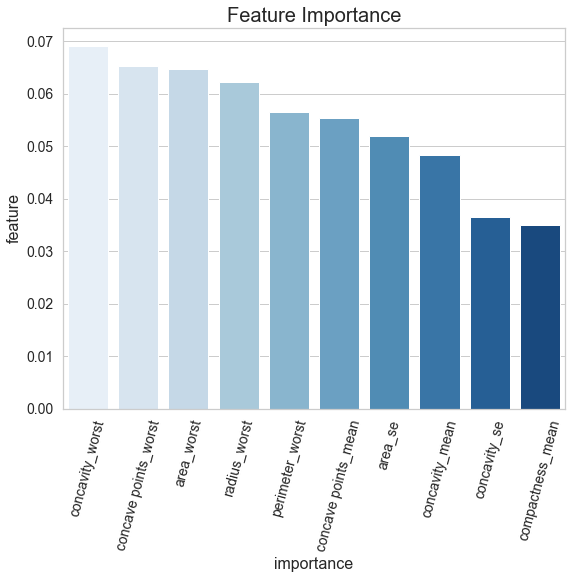

In [30]:
plot_bar(topfeatures_df, 'feature', 'importance', 'Feature Importance', "importance", 'feature')

In [31]:
topfeature_columns = topfeatures_df.feature.tolist()
topfeature_columns.insert(0,'diagnosis')
topfeature_columns

['diagnosis',
 'concavity_worst',
 'concave points_worst',
 'area_worst',
 'radius_worst',
 'perimeter_worst',
 'concave points_mean',
 'area_se',
 'concavity_mean',
 'concavity_se',
 'compactness_mean']

In [32]:
dfx = new_df[topfeature_columns]
dfx.shape
dfx.head()

,diagnosis,concavity_worst,concave points_worst,area_worst,radius_worst,perimeter_worst,concave points_mean,area_se,concavity_mean,concavity_se,compactness_mean
0,1.0,0.418033,0.362807,0.301037,0.33910,0.328167,0.245670,0.244331,0.316195,0.400593,0.423183
1,1.0,0.473547,0.362807,0.301037,0.33910,0.328167,0.928665,0.244331,0.566937,0.130193,0.209530
2,1.0,0.418033,0.362807,0.301037,0.33910,0.328167,0.245670,0.244331,0.316195,0.861647,0.423183
3,1.0,0.418033,0.362807,0.092140,0.32872,0.357472,0.245670,0.343087,0.316195,0.400593,0.423183
4,1.0,0.418033,0.362807,0.301037,0.33910,0.328167,0.245670,0.244331,0.316195,0.400593,0.423183


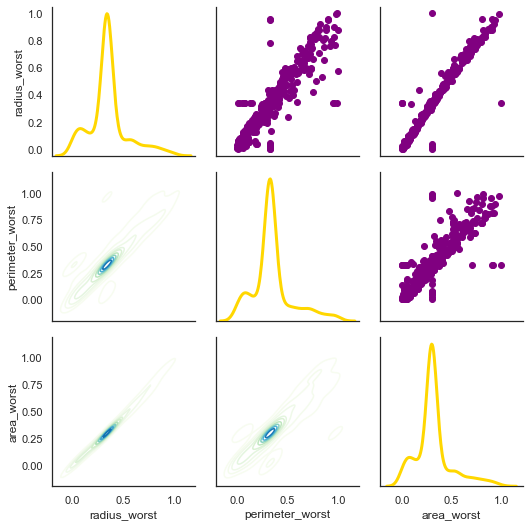

In [40]:
sns.set(style="white")
df = dfx.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="GnBu")
g.map_upper(plt.scatter, color="purple")
g.map_diag(sns.kdeplot, lw=3, color="gold")